<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>

El **cáncer de mama** es una proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Esta enfermedad clonal surge cuando una célula adquiere, a través de mutaciones, la capacidad de dividirse sin control, formando un tumor que puede invadir tejidos vecinos y propagarse a otras partes del cuerpo.

El conjunto de datos `BC.csv` contiene información sobre pacientes con tumores (benignos o malignos) y diversas características del tumor, calculadas a partir de imágenes digitalizadas de aspirados con aguja fina (FNA) de masas mamarias. Estas características describen los núcleos celulares en la imagen y permiten diferenciar entre tumores benignos y malignos.

A continuación, cargamos el conjunto de datos:

In [13]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

C:\Users\vmore\AppData\Local\Temp\ipykernel_8288\37940209.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Con base en la información presentada, responde las siguientes preguntas. Asegúrate de incluir el código necesario para realizar los análisis requeridos y proporciona una breve explicación que describa tus resultados y el proceso que seguiste.




1. Realice un análisis exploratorio del conjunto de datos.

Primero, revisemos informacion general de la informacion presentada.

In [3]:
df.shape

(569, 31)

Vemos que hay 31 columnas y 569 filas de datos en el dataframe. Veamos los tipos de datos que contiene.

In [4]:
df.dtypes.value_counts()

float64    30
int32       1
Name: count, dtype: int64

Vemos que en el dataframe hay solo datos flotantes y un dato entero. Veamos si hay celdas sin información.

In [5]:
df.isnull().sum().value_counts()

0    31
Name: count, dtype: int64

Vemos que las 31 columnas no tienen celdas sin información, luego el conjunto de datos está bien relleno. Como son muchas columnas, ver datos estadísticos de cada columna puede ser complicado, luego conviene hacer un histograma de cada columna para visualizar su comportamiento (pues son todos datos numéricos).

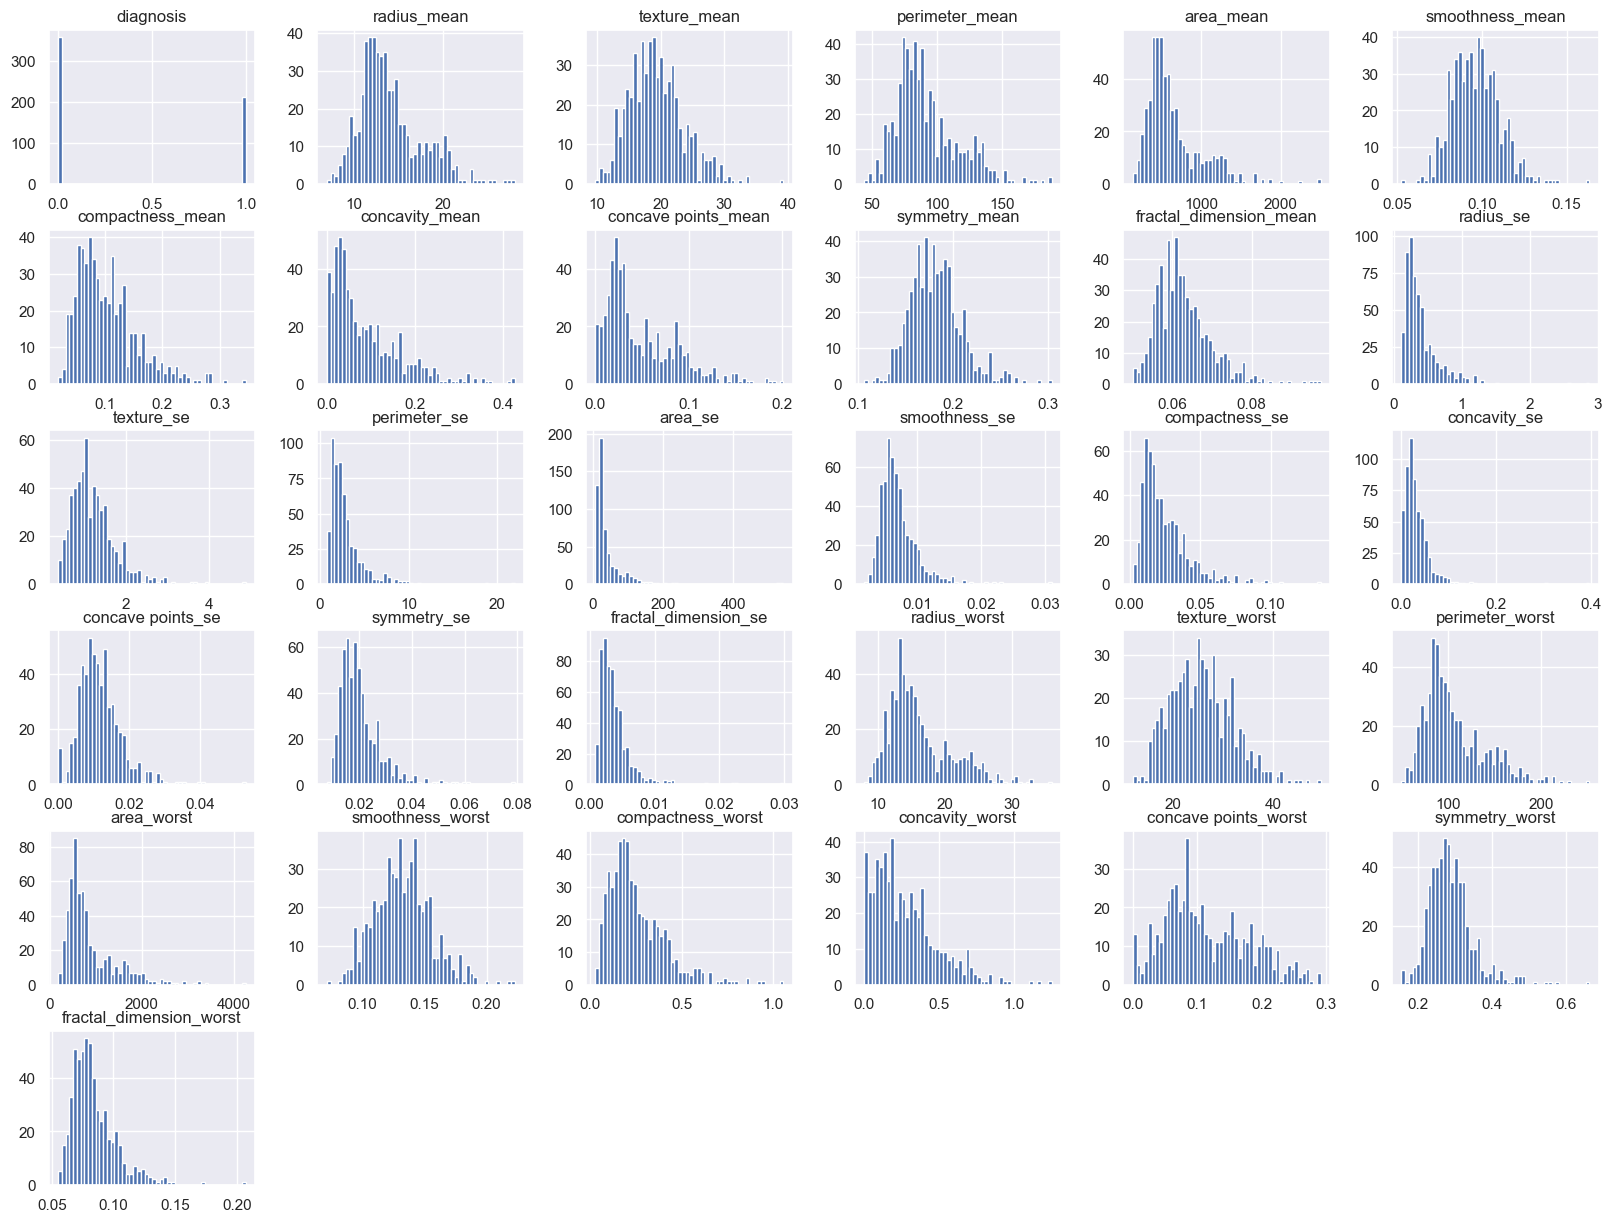

In [12]:
df.hist(bins = 50,figsize=(20,15))
plt.show()

2. Normalizar las variables numéricas con el método **StandardScaler**.

Como nos interesa predecir el diagnóstico con respecto a las demas características dadas en el dataframe, realmente solo nos interesa normalizar las columnas que no sean "diagnosis".

In [18]:
scaler=StandardScaler()
columns=df.drop('diagnosis',axis=1).columns
df_scaled=df.copy()
df_scaled[columns]=scaler.fit_transform(df_scaled[columns])
df_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


3. Realizar un método de reducción de dimensionalidad visto en clases.

Se usará el método de reducción de dimensionalidad PCA (Principal Component Analysis). Para esto, consideraremos suficientes componentes que describan el 95% del comportamiento de los datos del dataframe.

In [23]:
X=df_scaled.drop('diagnosis', axis=1)
y=df_scaled['diagnosis']

n=0
num_components=len(columns)
score=0
while(n<=num_components and score<0.95):
    n+=1
    pca = PCA(n_components=n)
    pca.fit(X)
    score = pca.explained_variance_ratio_.sum()
print(n,score)

10 0.9515688143366667


Entonces, podemos considerar solamente las primeras 10 componentes, es decir hemos hecho una reduccion de 31 componentes a 10 componentes asegurando de describir un poco mas del 95% del comportamiento de los datos. Creemos un dataframe con las 10 componentes principales.

In [68]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296


4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

Primero, creemos un conjunto de entrenamiento, de evaluación y de testeo para prevenir el overfitting. Recordemos que estaremos utilizando el dataframe de dimensión reducida.

In [69]:
#Conjunto de entrenamiento y evaluación.
X_manip, X_test, y_manip, y_test = train_test_split(df_pca, y, test_size=0.25, random_state=1)
#Separación de estos conjuntos.
X_train, X_eval, y_train, y_eval = train_test_split(X_manip, y_manip, test_size=0.25, random_state=1)

Vamos a utilizar los modelos de clasificación siguientes:

1) Logistic Regression

In [77]:
# Definir el modelo base
model = LogisticRegression()

# Rango de parámetros para Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500, 1000]
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo_lr = gs.best_estimator_
mejor_modelo_lr.fit(X_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo_lr.score(X_eval, y_eval)))

Mejor precisión en validación cruzada: 0.9717757936507937
Mejores parámetros: {'C': 1, 'max_iter': 100}
Precisión en el conjunto de evaluación: 0.963


2) Support Vector Machine (SVC)

In [82]:
# Definir el modelo base
model = SVC()

# Rango de parámetros para Grid Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'degree': [1, 2, 3]
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo_svc = gs.best_estimator_
mejor_modelo_svc.fit(X_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo_svc.score(X_eval, y_eval)))

Mejor precisión en validación cruzada: 0.9749503968253969
Mejores parámetros: {'C': 1, 'degree': 1}
Precisión en el conjunto de evaluación: 0.972


3) Random Forest

In [87]:
# Definir el modelo base
model = RandomForestClassifier(random_state=1)

# Rango de parámetros para Grid Search
param_grid = {
    'n_estimators': [10, 20, 50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, 25],
}

# Configuración y aplicación de Grid Search
gs = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',    # Métrica de evaluación
    cv=5,                  # Número de particiones de validación cruzada
    n_jobs=-1              # Usar todos los núcleos disponibles para acelerar el proceso
)

# Entrenamiento de Grid Search
gs.fit(X_train, y_train)

# Resultados del mejor modelo
print("Mejor precisión en validación cruzada:", gs.best_score_)
print("Mejores parámetros:", gs.best_params_)

# Entrenar y evaluar el mejor modelo en el conjunto de evaluación
mejor_modelo_rf = gs.best_estimator_
mejor_modelo_rf.fit(X_train, y_train)
print("Precisión en el conjunto de evaluación: {:.3f}".format(mejor_modelo_rf.score(X_eval, y_eval)))

Mejor precisión en validación cruzada: 0.9498015873015874
Mejores parámetros: {'max_depth': 5, 'n_estimators': 100}
Precisión en el conjunto de evaluación: 0.972


Podemos ver que, en este caso, los tres modelos tienen precisión en validación cruzada y en el conjunto de evaluación similares. Eso sí, el mejor modelo resultó ser SVC, pues tiene mayor o igual precisión en ambas categorías, y además resultó ser el más rápido en calcular. Luego, el modelo SVC es el mejor modelo a utilizar de estos tres, considerando la reducción de dimensionalidad por el PCA.